In [1]:
from variable.variable import Variable
from activation_functions.relu import ReLUActivation
relu_fn = ReLUActivation()

In [2]:
x = Variable(3)
y = Variable(4)

In [3]:
z = x + y 

In [4]:
z.grad = 10

In [5]:
z.backward()

In [6]:
x, y

(Variable(data=3, grad=10, _op=None, name=None, requires_grad=True),
 Variable(data=4, grad=10, _op=None, name=None, requires_grad=True))

In [8]:
from loss_functions.cce import CategoricalCrossEntropy
from variable.variable import Variable

cce = CategoricalCrossEntropy()

prediction = Variable([[[0.1, 0.2, 0.7], [0.7, 0.2, 0.1]]], requires_grad=True)
target = Variable([[[1, 0, 0], [0, 0, 1]]], requires_grad=True)

loss = cce(prediction, target)
print(loss)
## Should be 2.3
loss.backward()
prediction


Loss: 4.605170185988091


[[[Variable(data=0.1, grad=-10.0, _op=None, name=None, requires_grad=True),
   Variable(data=0.2, grad=0.0, _op=None, name=None, requires_grad=True),
   Variable(data=0.7, grad=0.0, _op=None, name=None, requires_grad=True)],
  [Variable(data=0.7, grad=0.0, _op=None, name=None, requires_grad=True),
   Variable(data=0.2, grad=0.0, _op=None, name=None, requires_grad=True),
   Variable(data=0.1, grad=-10.0, _op=None, name=None, requires_grad=True)]]]

In [9]:
prediction[0][0][0]._prev

set()

In [10]:
from models.simple_model import SimpleModel
input_size = 3
hidden_size = 10
output_size = 1


model = SimpleModel(input_size, hidden_size, output_size)

In [12]:
from optimizer.sgd import SGDOptimizer
from loss_functions.mse import MSELoss
from variable.variable import Variable
import random

loss_fn = MSELoss()

optimizer = SGDOptimizer(model.parameters(), learning_rate=0.0001)

losses = []
#let's feed random input and make the model always output 0

for i in range(100):
    x = [[[Variable(random.randint(0, 10)) for i in range(input_size)]]]
    y = [[[Variable(0)]]]
    output = model(x)
    loss = loss_fn(output, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss)
    losses.append(loss.loss)


AttributeError: 'list' object has no attribute 'value'

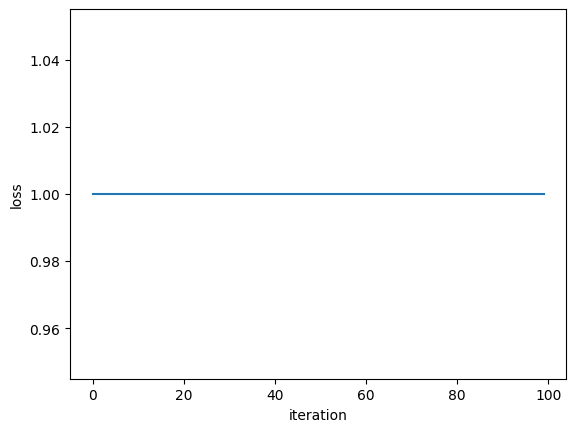

In [8]:
#plot the losses
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.show()



In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset

# Transform the images to Tensors and normalize pixel values to [0, 1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

# Download the entire MNIST dataset (but we'll only use a subset of it)
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create a subset of the dataset, selecting only the first 10 samples
subset_indices = list(range(10))  # Use the first 10 samples
train_subset = Subset(trainset, subset_indices)

# Create a DataLoader for the subset
trainloader = torch.utils.data.DataLoader(train_subset, batch_size=1, shuffle=True)

# Example of iterating through the subset of the data
for images, labels in trainloader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels shape: {labels.shape}")
    break


Batch of images shape: torch.Size([1, 784])
Batch of labels shape: torch.Size([1])


In [2]:
from activation_functions.relu import ReLUActivation

relu_fn = ReLUActivation()

In [3]:
#lets takecare of formatting first 
        # images = Variable(images.tolist())


        # one_hot_labels = torch.zeros(64, 10)
        # one_hot_labels.scatter_(1, labels.view(-1, 1), 1)
        # labels = Variable(one_hot_labels.tolist())
        # optimizer.zero_grad()

#from that we know that we need to make the images a list of Variables and the labels a list of Variables

#lets takecare of formatting first
from variable.variable import Variable
input_images = []
labels_encoded = []

for images, labels in trainloader:
    input_images.append([Variable(images.tolist(), requires_grad=False)])
    one_hot_labels = torch.zeros(1, 10)
    one_hot_labels.scatter_(1, labels.view(-1, 1), 1)
    labels_encoded.append([Variable(one_hot_labels.tolist(), requires_grad=False)])



In [4]:
#lets iterate through the data and train the model
from models.simple_model import SimpleModel
from optimizer.sgd import SGDOptimizer
from loss_functions.cce import CategoricalCrossEntropy

model = SimpleModel(784, 128, 10)
loss_fn = CategoricalCrossEntropy()
optimizer = SGDOptimizer(model.parameters(), learning_rate=0.001)

losses = []

for epoch in range(5):
    for images, labels in zip(input_images, labels_encoded):
        optimizer.zero_grad()
        output = model(images)
        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.loss)
        print(loss)

[[[Variable(data=2421.355518099574, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171A1614F0>, name=None, requires_grad=True), Variable(data=2147.1316693521694, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171A19C6E0>, name=None, requires_grad=True), Variable(data=2392.605435042828, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171A1C3890>, name=None, requires_grad=True), Variable(data=2209.888892563091, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171A1FEA80>, name=None, requires_grad=True), Variable(data=2163.67615726901, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171A22DC70>, name=None, requires_grad=True), Variable(data=2286.245933237312, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171A268E60>, name=None, requires_grad=True), Variable(data=2294.0318173832843, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171A2A0050>, name=None, requires_grad=True), Variable(data=2094.3648036455165, grad=0, _o

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x00000216E5C67FB0>>
Traceback (most recent call last):
  File "C:\Users\paulilioaica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel\ipkernel.py", line 785, in _clean_thread_parent_frames
    active_threads = {thread.ident for thread in threading.enumerate()}
                                                 ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1776.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1544, in enumerate
    return list(_active.values()) + list(_limbo.values())
                ^^^^^^^^^^^^^^^^
KeyboardInterrupt: 


Loss: 27.631021115928547
[[[Variable(data=4086472303200.126, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171A720FB0>, name=None, requires_grad=True), Variable(data=2914284217735.66, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171A7581A0>, name=None, requires_grad=True), Variable(data=3166451207479.1436, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171A783350>, name=None, requires_grad=True), Variable(data=2889049714760.5435, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171A7B2540>, name=None, requires_grad=True), Variable(data=2866828328732.8735, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171A7E5730>, name=None, requires_grad=True), Variable(data=2921073671307.205, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171A81C920>, name=None, requires_grad=True), Variable(data=2904319312527.687, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171A84BAD0>, name=None, requires_grad=True), Variable(data=2973

KeyboardInterrupt: 

In [15]:
x = model(images)

[[[Variable(data=8536225403718.36, grad=0, _op=<ops.basic_ops.AddOperation object at 0x00000217111EC830>, name=None, requires_grad=True), Variable(data=6087730269097.401, grad=0, _op=<ops.basic_ops.AddOperation object at 0x00000217112139E0>, name=None, requires_grad=True), Variable(data=6614567629944.227, grad=0, _op=<ops.basic_ops.AddOperation object at 0x0000021711246BD0>, name=None, requires_grad=True), Variable(data=6034995615012.341, grad=0, _op=<ops.basic_ops.AddOperation object at 0x0000021711275DC0>, name=None, requires_grad=True), Variable(data=5988586434828.848, grad=0, _op=<ops.basic_ops.AddOperation object at 0x00000217112B0FB0>, name=None, requires_grad=True), Variable(data=6101905726950.751, grad=0, _op=<ops.basic_ops.AddOperation object at 0x00000217112E41A0>, name=None, requires_grad=True), Variable(data=6066896146442.544, grad=0, _op=<ops.basic_ops.AddOperation object at 0x000002171130F350>, name=None, requires_grad=True), Variable(data=6211482076134.185, grad=0, _op=<

In [16]:
loss = loss_fn(x, labels)

In [18]:
model.layer2.weight

[[Variable(data=0.8437658990834823, grad=0.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.9635211241109287, grad=0.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.9027947035798662, grad=0.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.08363587392413198, grad=0.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.6811108613098505, grad=0.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.6025231098427104, grad=0.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.1257347959651658, grad=0.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.2667384740418287, grad=0.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.43990191943824214, grad=0.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.07722757392641545, grad=0.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.821933636965871, grad=0.0, _op=None, name=None, requires_grad=True),
  Variable(data=0.301621582362

In [5]:
import random

In [29]:
for i in range(len(x)):
    for j in range(len(x[i])):
        for k in range(len(x[i][j])):
            x[i][j][k].grad = random.randint(0, 10)
            x[i][j][k].backward()

In [32]:
model.layer2.weight

[[Variable(data=0.9952329109010041, grad=3.0298240105119974e-136, _op=None, name=None, requires_grad=True),
  Variable(data=0.43484678084967765, grad=3.249423000964819e-136, _op=None, name=None, requires_grad=True),
  Variable(data=0.21677204379895232, grad=2.9026390043058375e-136, _op=None, name=None, requires_grad=True),
  Variable(data=0.113877258254382, grad=2.7407112538588124e-136, _op=None, name=None, requires_grad=True),
  Variable(data=0.050857506279613385, grad=2.9462030231468902e-136, _op=None, name=None, requires_grad=True),
  Variable(data=0.4137997512062235, grad=2.7972922007880862e-136, _op=None, name=None, requires_grad=True),
  Variable(data=0.7651793320362852, grad=2.7045171564332867e-136, _op=None, name=None, requires_grad=True),
  Variable(data=0.06356644564336833, grad=2.9977634869509395e-136, _op=None, name=None, requires_grad=True),
  Variable(data=0.36145702037742733, grad=2.730222376578987e-136, _op=None, name=None, requires_grad=True),
  Variable(data=0.9690022

In [14]:
from normalization.softmax import Softmax
from variable.variable import Variable

In [15]:
softmax = Softmax()

In [16]:
softmax(output)

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


[[Variable(data=0.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requires_grad=True),
  Variable(data=0.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requires_grad=True),
  Variable(data=0.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requires_grad=True),
  Variable(data=0.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requires_grad=True),
  Variable(data=1.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requires_grad=True),
  Variable(data=0.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requires_grad=True),
  Variable(data=0.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requires_grad=True),
  Variable(data=0.0, grad=0, _op=<normalization.softmax.Softmax object at 0x000002100DB67A40>, name=None, requi

In [8]:
output[0][0]._prev

{Variable(data=7, grad=0, _op=None, name=None, requires_grad=False)}